# Condition differences

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import mne
import os
import hmp
from mne.io import read_info
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import bambi as bmb
import arviz as az
from matplotlib.lines import Line2D

cpus = 16

/tmp/ipykernel_43066/821937117.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Loading EEG data
Then resample and create epochs (i.e. trial where time 0 is the time at which the stimulus appeared) and store in common xarray file (see https://docs.xarray.dev/en/stable/ for more info on that format)

In [2]:
sfreq = 500 #at what sampling rate we want the data, downsampling to 100Hz is computationally less intensive for hmp instances

epoch_data_path = os.path.join('data/')#Declaring path where the eeg data is
subj_names = [x.split('.')[0] for x in os.listdir(epoch_data_path) if 'processed' in x]#Extracting subject name based on the file name
subj_files = [epoch_data_path+x+'.fif' for x in subj_names]#Create a list of files that can be read from the folder

epoch_data = hmp.utils.read_mne_data(subj_files, epoched=True, sfreq=sfreq, 
                            rt_col='RT', scale=1000,
                            verbose=False, subj_idx=subj_names)#Turning verbose off for the documentation but it is recommended to leave it on as some output from MNE might be useful
epoch_data['cue'] = epoch_data.cue.fillna(' ')
epoch_data['resp'] = epoch_data.resp.fillna(' ')
info = read_info(subj_files[0], verbose=False)

Processing participant data/processed_500Hz_0012_epo.fif's epoched eeg


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index


179 trials were retained for participant data/processed_500Hz_0012_epo.fif
Processing participant data/processed_500Hz_0009_epo.fif's epoched eeg
193 trials were retained for participant data/processed_500Hz_0009_epo.fif
Processing participant data/processed_500Hz_0015_epo.fif's epoched eeg


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index


193 trials were retained for participant data/processed_500Hz_0015_epo.fif
Processing participant data/processed_500Hz_0025_epo.fif's epoched eeg
181 trials were retained for participant data/processed_500Hz_0025_epo.fif
Processing participant data/processed_500Hz_0007_epo.fif's epoched eeg


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index


185 trials were retained for participant data/processed_500Hz_0007_epo.fif
Processing participant data/processed_500Hz_0017_epo.fif's epoched eeg
187 trials were retained for participant data/processed_500Hz_0017_epo.fif
Processing participant data/processed_500Hz_0016_epo.fif's epoched eeg


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index


192 trials were retained for participant data/processed_500Hz_0016_epo.fif
Processing participant data/processed_500Hz_0002_epo.fif's epoched eeg
193 trials were retained for participant data/processed_500Hz_0002_epo.fif
Processing participant data/processed_500Hz_0024_epo.fif's epoched eeg


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index


168 trials were retained for participant data/processed_500Hz_0024_epo.fif
Processing participant data/processed_500Hz_0006_epo.fif's epoched eeg
178 trials were retained for participant data/processed_500Hz_0006_epo.fif
Processing participant data/processed_500Hz_0021_epo.fif's epoched eeg


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index


188 trials were retained for participant data/processed_500Hz_0021_epo.fif
Processing participant data/processed_500Hz_0010_epo.fif's epoched eeg
181 trials were retained for participant data/processed_500Hz_0010_epo.fif
Processing participant data/processed_500Hz_0011_epo.fif's epoched eeg


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index


183 trials were retained for participant data/processed_500Hz_0011_epo.fif
Processing participant data/processed_500Hz_0008_epo.fif's epoched eeg
172 trials were retained for participant data/processed_500Hz_0008_epo.fif
Processing participant data/processed_500Hz_0018_epo.fif's epoched eeg


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index


188 trials were retained for participant data/processed_500Hz_0018_epo.fif
Processing participant data/processed_500Hz_0020_epo.fif's epoched eeg
168 trials were retained for participant data/processed_500Hz_0020_epo.fif
Processing participant data/processed_500Hz_0001_epo.fif's epoched eeg


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index


187 trials were retained for participant data/processed_500Hz_0001_epo.fif
Processing participant data/processed_500Hz_0019_epo.fif's epoched eeg
183 trials were retained for participant data/processed_500Hz_0019_epo.fif
Processing participant data/processed_500Hz_0003_epo.fif's epoched eeg


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index


178 trials were retained for participant data/processed_500Hz_0003_epo.fif
Processing participant data/processed_500Hz_0005_epo.fif's epoched eeg
183 trials were retained for participant data/processed_500Hz_0005_epo.fif
Processing participant data/processed_500Hz_0013_epo.fif's epoched eeg


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index


180 trials were retained for participant data/processed_500Hz_0013_epo.fif
Processing participant data/processed_500Hz_0022_epo.fif's epoched eeg
188 trials were retained for participant data/processed_500Hz_0022_epo.fif
Processing participant data/processed_500Hz_0014_epo.fif's epoched eeg


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index


171 trials were retained for participant data/processed_500Hz_0014_epo.fif
Processing participant data/processed_500Hz_0023_epo.fif's epoched eeg
189 trials were retained for participant data/processed_500Hz_0023_epo.fif
Processing participant data/processed_500Hz_0004_epo.fif's epoched eeg


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index


159 trials were retained for participant data/processed_500Hz_0004_epo.fif


## Tranforming data, PCA, standardization

In [3]:
hmp_data = hmp.utils.transform_data(epoch_data, n_comp=10)

In [4]:
epoch_data

<xarray.Dataset>
Dimensions:      (epochs: 200, channels: 30, samples: 1160, participant: 25)
Coordinates:
  * epochs       (epochs) int64 0 1 2 3 4 5 6 7 ... 193 194 195 196 197 198 199
  * channels     (channels) <U3 'Fp1' 'Fp2' 'AFz' 'F7' ... 'CPz' 'CP2' 'CP6'
  * samples      (samples) int64 0 1 2 3 4 5 6 ... 1154 1155 1156 1157 1158 1159
    stim         (participant, epochs) float64 1.0 2.0 2.0 1.0 ... nan 1.0 1.0
    resp         (participant, epochs) object 'resp_left' ... 'resp_right'
    RT           (participant, epochs) float64 1.157e+03 506.0 ... 1.426e+03
    cue          (participant, epochs) object 'SP' 'SP' 'SP' ... ' ' 'AC' 'AC'
    movement     (participant, epochs) object 'stim_left' ... 'stim_left'
    trigger      (participant, epochs) object 'SP/stim_left/resp_left' ... 'A...
  * participant  (participant) <U24 'processed_500Hz_0012_epo' ... 'processed...
Data variables:
    data         (participant, epochs, channels, samples) float64 2.546 ... nan
Attributes:
    sfreq:           500.0
    offset:          0
    lowpass:         35.0
    highpass:        1.0
    lower_limit_RT:  0
    upper_limit_RT:  inf

## HMP in the Speed condition

In [5]:
# select the data
hmp_speed_data = hmp.utils.condition_selection(hmp_data, epoch_data, 'SP', variable='cue') # select the conditions where participants needs to be fast
init_speed = hmp.models.hmp(hmp_speed_data, sfreq=epoch_data.sfreq, cpus=cpus)

/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/visu.py:93: FutureWarning: mne.io.meas_info.Info is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  from mne.io.meas_info import Info


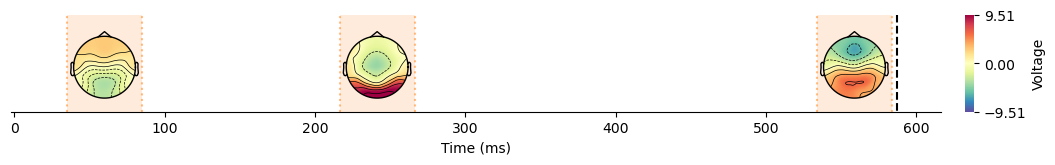

In [6]:
# estimates_speed = init_speed.fit()
estimates_speed = hmp.utils.load_fit('estimation_files/estimates_speed.nc')
estimates_speed['eventprobs'] = estimates_speed.eventprobs.transpose('trial_x_participant','samples','event')#temporary fix https://github.com/GWeindel/hmp/issues/122
hmp.visu.plot_topo_timecourse(epoch_data, estimates_speed, info, init_speed, as_time=True)

## HMP in the Accuracy condition

We repeat the same analysis for the accuracy condition.

In [7]:
# select the data
hmp_accuracy_data = hmp.utils.condition_selection(hmp_data, epoch_data, 'AC', variable='cue') # select the conditions where participants needs to be accurate
init_accuracy = hmp.models.hmp(hmp_accuracy_data, sfreq=epoch_data.sfreq, cpus=cpus)

/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/visu.py:93: FutureWarning: mne.io.meas_info.Info is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  from mne.io.meas_info import Info


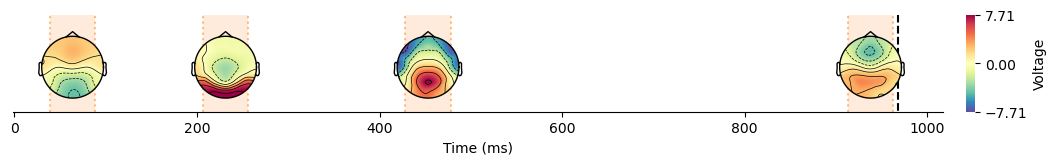

In [8]:
#apply fit function to build maximal model
# estimates_accuracy = init_accuracy.fit()
estimates_accuracy = hmp.utils.load_fit('estimation_files/estimates_accuracy.nc')
estimates_accuracy['eventprobs'] = estimates_accuracy.eventprobs.transpose('trial_x_participant','samples','event')#temporary fix https://github.com/GWeindel/hmp/issues/122

hmp.visu.plot_topo_timecourse(epoch_data, estimates_accuracy, info, init_accuracy, as_time=True)

/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/visu.py:93: FutureWarning: mne.io.meas_info.Info is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  from mne.io.meas_info import Info
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/visu.py:93: FutureWarning: mne.io.meas_info.Info is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  from mne.io.meas_info import Info


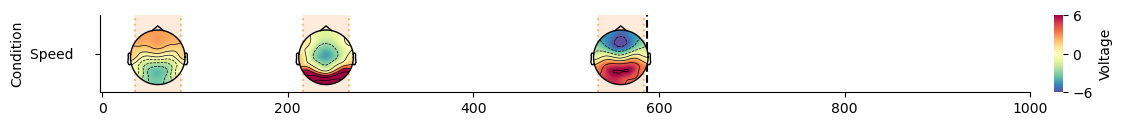

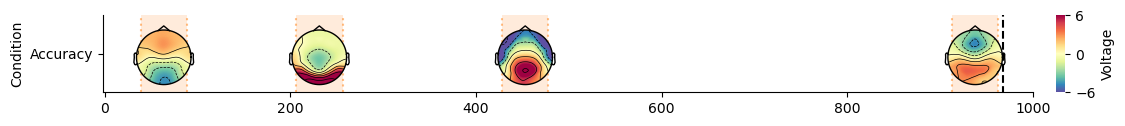

In [9]:
for condition in zip([estimates_speed, estimates_accuracy],
                     [init_speed, init_accuracy],
                     [hmp_speed_data, hmp_accuracy_data],
                    ['Speed    ', 'Accuracy']):
    fig, ax = plt.subplots(1,1, figsize=(12,1))
    hmp.visu.plot_topo_timecourse(epoch_data, condition[0], 
                          info, condition[1],  max_time=1000, dpi=300, ax=ax,
                          ylabels={'Condition':[condition[3]]},vmin=-6,vmax=6, as_time=True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig('../../plots/SAT_HMP_solutions_%s.png'%condition[3],dpi=300,transparent=True,bbox_inches='tight')

# By-trial between event analysis

We align speed and accuracy to the same number of events to ease the by-trial analysis.

/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


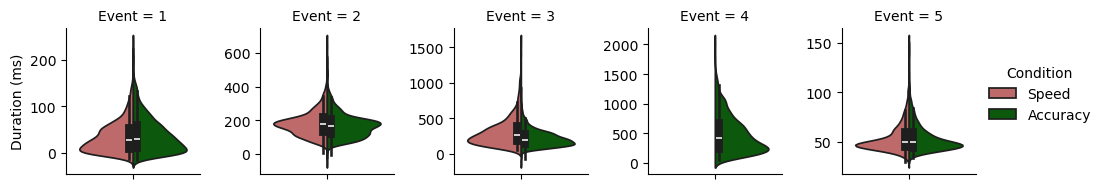

In [10]:
times_accuracy = init_accuracy.compute_times(init_accuracy,estimates_accuracy, duration=True,fill_value=0, add_rt=True, as_time=True).unstack().to_dataframe(name='Duration').reset_index()
# times_accuracy.loc[times_accuracy.stage == 3, 'Duration'] = times_accuracy.loc[times_accuracy.stage == 3, 'Duration'].values + times_accuracy.loc[times_accuracy.stage == 4, 'Duration'].values##times_accuracy.loc[times_accuracy.stage == 4, 'Duration'] + times_accuracy.loc[times_accuracy.stage == 5, 'Duration']
# times_accuracy = times_accuracy[times_accuracy.stage != 4]
times_accuracy.loc[:,'stage'] = times_accuracy.loc[:,'stage'].astype('int')
times_speed = init_speed.compute_times(init_speed,estimates_speed, duration=True,fill_value=0, add_rt=True, as_time=True).unstack().to_dataframe(name='Duration')
index = times_speed.index.names
times_speed = times_speed.reset_index()
times_speed.loc[:,'stage'] = times_speed.stage.replace({4:5})
times_speed = times_speed.set_index(index)
times_accuracy = times_accuracy.set_index(index)
sat_array = epoch_data.sel(channels='C4', samples=0).squeeze().stack({'trial_x_participant':['participant','epochs']}).data.dropna('trial_x_participant', how="all").to_dataframe()[["channels","cue","data"]].reset_index().set_index(['participant','epochs']).cue
times = pd.concat([times_speed.dropna(),times_accuracy.dropna()]).reset_index().set_index(['participant','trials'])
sat_array.reset_index().rename({'epochs':'trials'},axis=1).set_index(['participant','trials'])
times['Condition'] = sat_array
times = times.rename({'stage':'Event'}, axis=1).reset_index()
times = times.replace({'SP':'Speed','AC':'Accuracy'})
times = times.reset_index()
times['log_duration'] = np.log(times.Duration)
times['Duration (ms)'] = times['Duration']
axes = sns.catplot(kind='violin', y='Duration (ms)', hue='Condition', data=times, col='Event', units='participant',
            sharey=False,split=True, aspect=1, height=2, palette=['indianred','darkgreen'])#, saturation=1)

plt.savefig('../../plots/LMM-SAT.png',dpi=300,transparent=True,bbox_inches='tight')

In [11]:
times_accuracy = init_accuracy.compute_times(init_accuracy,estimates_accuracy, duration=True,fill_value=0, add_rt=True, as_time=True).unstack().to_dataframe(name='Duration').reset_index()
times_accuracy.loc[times_accuracy.stage == 3, 'Duration'] = times_accuracy.loc[times_accuracy.stage == 3, 'Duration'].values + times_accuracy.loc[times_accuracy.stage == 4, 'Duration'].values##times_accuracy.loc[times_accuracy.stage == 4, 'Duration'] + times_accuracy.loc[times_accuracy.stage == 5, 'Duration']
times_accuracy = times_accuracy[times_accuracy.stage != 4]
times_accuracy.loc[:,'stage'] = times_accuracy.stage.replace({5:4})
times_accuracy.loc[:,'stage'] = times_accuracy.loc[:,'stage'].astype('int')
times_speed = init_speed.compute_times(init_speed,estimates_speed, duration=True,fill_value=0, add_rt=True, as_time=True).unstack().to_dataframe(name='Duration')
times_accuracy = times_accuracy.set_index(times_speed.index.names)

In [12]:

sat_array = epoch_data.sel(channels='C4', samples=0).squeeze().stack({'trial_x_participant':['participant','epochs']}).data.dropna('trial_x_participant', how="all").to_dataframe()[["channels","cue","data"]].reset_index().set_index(['participant','epochs']).cue
times = pd.concat([times_speed.dropna(),times_accuracy.dropna()]).reset_index().set_index(['participant','trials'])
sat_array.reset_index().rename({'epochs':'trials'},axis=1).set_index(['participant','trials'])
times['Condition'] = sat_array
times = times.rename({'stage':'Event'}, axis=1).reset_index()
times = times.replace({'SP':'Speed','AC':'Accuracy'})
times = times.reset_index()

duration_model = bmb.Model("Duration ~ 0 + Event + Event:Condition + (0+Event + Event : Condition | participant) ", times, family="gaussian", 
                        categorical='Event', dropna=True)
path = 'estimation_files/'
filename = 'LME_duration_fit_int.nc'
if filename not in os.listdir(path):
    fit = duration_model.fit(inference_method='nuts_numpyro',)
    fit.to_netcdf(path+'/'+filename)
else:
    fit = az.from_netcdf(path+'/'+filename)


Compiling...
Compilation time = 0:00:17.423607
Sampling...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Sampling time = 0:07:35.009231
Transforming variables...
Transformation time = 0:00:00.238527


In [14]:
az.summary(fit, var_names=list(fit.posterior.data_vars.keys())[:5]).iloc[:,:4].to_latex(float_format="{:0.3f}".format, bold_rows=True)

'\\begin{tabular}{lrrrr}\n\\toprule\n & mean & sd & hdi_3% & hdi_97% \\\\\n\\midrule\n\\textbf{Event[1]} & 38.776 & 2.868 & 33.396 & 44.238 \\\\\n\\textbf{Event[2]} & 167.666 & 4.796 & 158.734 & 176.403 \\\\\n\\textbf{Event[3]} & 706.666 & 34.903 & 640.694 & 771.385 \\\\\n\\textbf{Event[4]} & 53.826 & 2.665 & 48.839 & 58.889 \\\\\n\\textbf{Event:Condition[1, Speed]} & -3.828 & 3.958 & -11.211 & 3.624 \\\\\n\\textbf{Event:Condition[2, Speed]} & 13.674 & 4.749 & 4.771 & 22.419 \\\\\n\\textbf{Event:Condition[3, Speed]} & -388.923 & 31.814 & -449.517 & -330.769 \\\\\n\\textbf{Event:Condition[4, Speed]} & 0.107 & 3.758 & -7.286 & 6.880 \\\\\n\\textbf{Duration_sigma} & 126.891 & 0.664 & 125.634 & 128.139 \\\\\n\\textbf{Event|participant_sigma[1]} & 2.728 & 2.024 & 0.000 & 6.272 \\\\\n\\textbf{Event|participant_sigma[2]} & 18.558 & 4.242 & 11.022 & 27.066 \\\\\n\\textbf{Event|participant_sigma[3]} & 89.827 & 22.448 & 48.726 & 133.326 \\\\\n\\textbf{Event|participant_sigma[4]} & 1.731 & 1.344 

In [15]:
az.summary(fit, var_names=list(fit.posterior.data_vars.keys())[:6])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Event[1],38.776,2.868,33.396,44.238,0.038,0.027,5763.0,3244.0,1.0
Event[2],167.666,4.796,158.734,176.403,0.096,0.068,2508.0,2500.0,1.0
Event[3],706.666,34.903,640.694,771.385,1.054,0.747,1091.0,2108.0,1.0
Event[4],53.826,2.665,48.839,58.889,0.035,0.025,5729.0,3270.0,1.0
"Event:Condition[1, Speed]",-3.828,3.958,-11.211,3.624,0.054,0.048,5425.0,3297.0,1.0
...,...,...,...,...,...,...,...,...,...
"Event|participant[4, processed_500Hz_0021_epo]",-0.045,2.060,-4.284,3.666,0.025,0.024,8516.0,3934.0,1.0
"Event|participant[4, processed_500Hz_0022_epo]",0.034,2.105,-3.925,4.399,0.030,0.028,7185.0,3675.0,1.0
"Event|participant[4, processed_500Hz_0023_epo]",-0.001,2.018,-3.824,4.335,0.024,0.029,8614.0,3488.0,1.0
"Event|participant[4, processed_500Hz_0024_epo]",0.170,2.101,-3.691,4.732,0.027,0.027,7558.0,3707.0,1.0


## Stimulus locked ERP

In [16]:
times_speed = init_speed.compute_times(init_speed, estimates_speed.dropna('event'), fill_value=0, add_rt=True)
stage_times_speed = init_speed.compute_times(init_speed, estimates_speed.dropna('event'), fill_value=0, duration=True, add_rt=True)
times_accuracy = init_accuracy.compute_times(init_accuracy, estimates_accuracy.dropna('event'), fill_value=0, add_rt=True)
stage_times_accuracy = init_accuracy.compute_times(init_accuracy, estimates_accuracy.dropna('event'), fill_value=0, duration=True, add_rt=True)

/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/visu.py:1086: RuntimeWarning: Mean of empty slice
  mean_signal =  np.nanmean(data[:,event,:],axis=0)[:time_current]
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/scipy/stats/_resampling.py:630: RuntimeWarning: Mean of empty slice
  theta_hat_b.append(statistic(*resampled_data, axis=-1))
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/scipy/stats/_resampling.py:113: RuntimeWarning: Mean of empty slice
  theta_hat = np.asarray(statistic(*data, axis=axis))[..., None]
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/scipy/stats/_resampling.py:130: RuntimeWarning: Mean of empty slice
  theta_hat_i.append(statistic(*broadcasted, axis=-1))
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/visu.py:1091: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statist

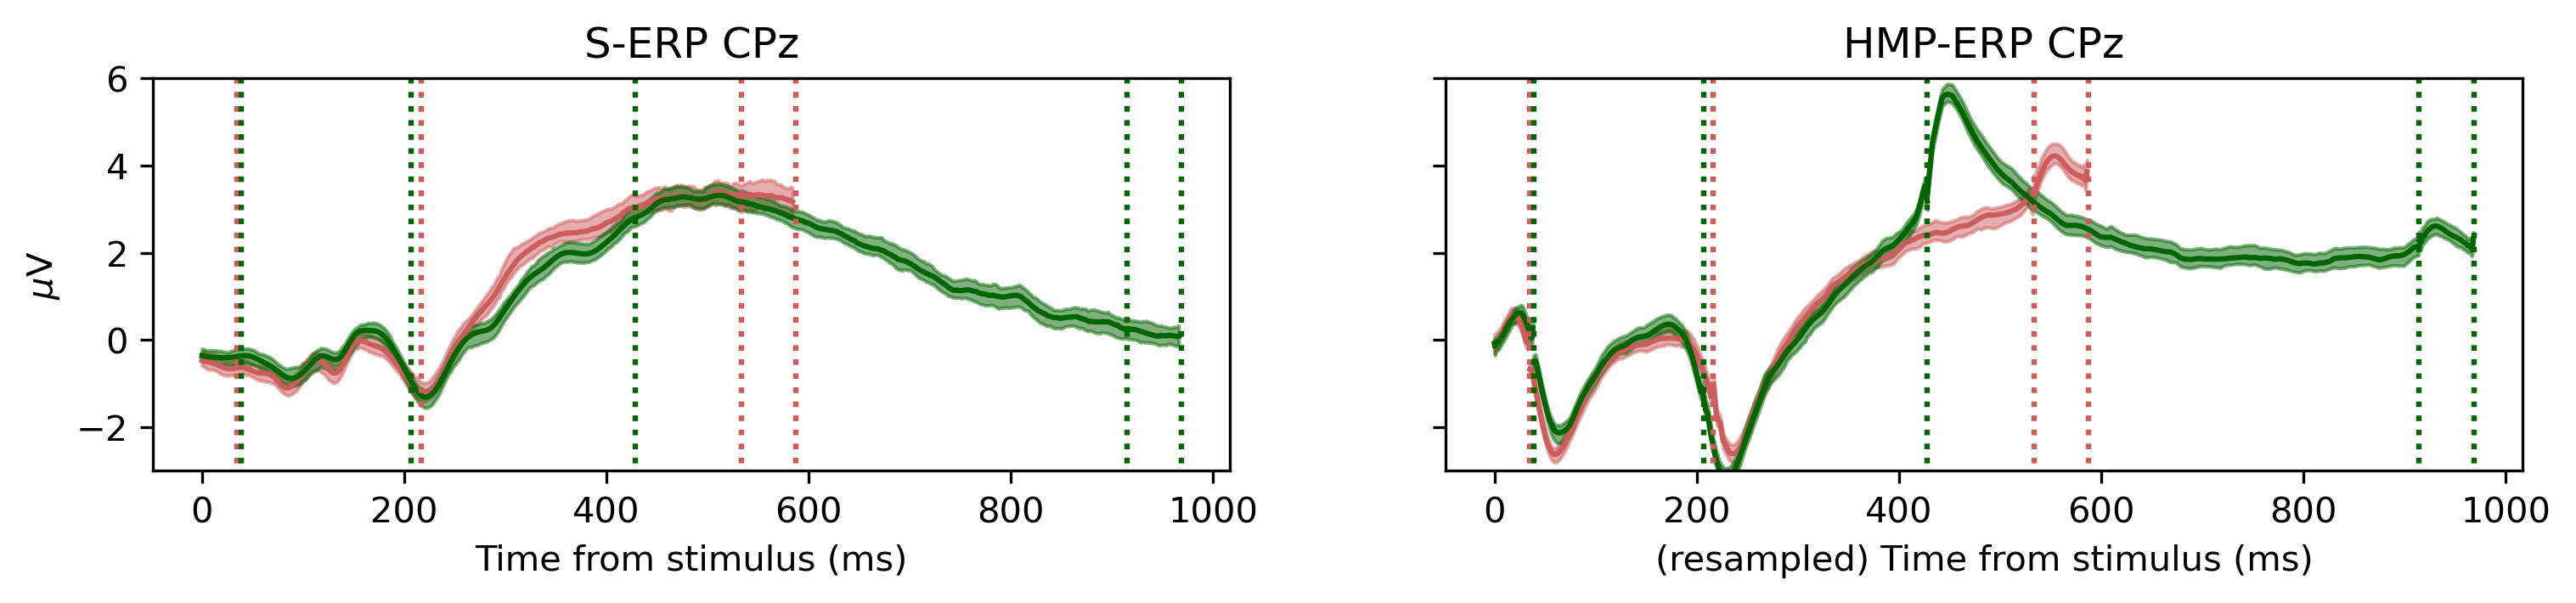

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,2), sharey=True, sharex=True, dpi=300)
times_sat = {'SP':times_speed, 'AC':times_accuracy}
last_stage_sat = {'SP':4, 'AC':5}
color_sat = {'SP':'indianred', 'AC':'darkgreen'}
channel = 'CPz'
for condition in ['SP','AC']:
    BRP_times, last_stage, color = times_sat[condition], last_stage_sat[condition], color_sat[condition]
    times = BRP_times.sel(event=[0,last_stage])
    times['event'] = [0,1]#Stim to response, traditional ERP
    test = hmp.visu.erp_data(epoch_data.stack(trial_x_participant=["participant","epochs"]), times, channel)
    hmp.visu.plot_erp(times, test, color_sat[condition], ax[0], upsample=2, bootstrap=100)
    ax[0].vlines(times_speed.mean('trial_x_participant')[1:]*2, -8,8, color='indianred', ls=':')
    ax[0].vlines(times_accuracy.mean('trial_x_participant')[1:]*2, -8,8, color='darkgreen', ls=':')
    times = BRP_times
    test = hmp.visu.erp_data(epoch_data.stack(trial_x_participant=["participant","epochs"]), times, channel,100)
    hmp.visu.plot_erp(times, test, color_sat[condition], ax[1], upsample=2, bootstrap=100)
    ax[1].vlines(times_speed.mean('trial_x_participant')[1:]*2, -8,8, color='indianred', ls=':')
    ax[1].vlines(times_accuracy.mean('trial_x_participant')[1:]*2, -8,8, color='darkgreen', ls=':')
    ax[0].set_title('S-ERP %s'%channel)
    ax[1].set_title('HMP-ERP %s'%channel)
    ax[0].set_ylabel(r'$\mu$V')
    ax[0].set_xlabel('Time from stimulus (ms)')
    ax[1].set_xlabel('(resampled) Time from stimulus (ms)')
plt.ylim(-3,6)
plt.savefig('../../plots/stim-locked_resampled_HMPRP.png',dpi=300,transparent=True,bbox_inches='tight')

## By-event centered

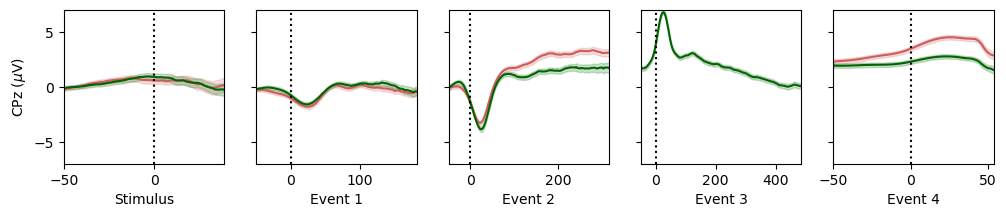

In [18]:
data_speed = epoch_data.where(epoch_data.cue =='SP',drop=True).stack({'trial_x_participant':['participant','epochs']}).data.dropna('trial_x_participant', how="all")
data_accuracy = epoch_data.where(epoch_data.cue =='AC',drop=True).stack({'trial_x_participant':['participant','epochs']}).data.dropna('trial_x_participant', how="all")

baseline = 25

fig, ax = plt.subplots(1,5, figsize=(12,2), sharey=True, sharex=False)
speed_plot_dict = {0:ax[0], 1:ax[1], 2:ax[2], 3:ax[4]}
for stage in estimates_accuracy.stage:
    # if stage> 0:
    bsl = baseline
    # else:
    #     bsl = 0
    if stage < 4:
        BRP = hmp.utils.event_times(data_speed, times_speed,'CPz', stage=stage, baseline = bsl)
        time_limit_sp = stage_times_speed.sel(stage=stage+1).mean()*2
        df = pd.DataFrame(BRP).melt(var_name='Time')
        df.Time -= bsl
        df.Time = df.Time*2#500Hz to ms
        sns.lineplot(x="Time", y="value", data=df,ax=speed_plot_dict[int(stage)], color='indianred')
    BRP = hmp.utils.event_times(data_accuracy, times_accuracy,'CPz',stage=stage, baseline = bsl)
    time_limit_acc = stage_times_accuracy.sel(stage=stage+1).mean()*2#np.mean(stage_times_accuracy.sel(stage=stage+1)*2, axis=0)
    df = pd.DataFrame(BRP).melt(var_name='Time')
    df.Time -= bsl
    df.Time = df.Time*2
    sns.lineplot(x="Time", y="value", data=df,ax=ax[stage], color='darkgreen')
    ax[stage].vlines(0,-7,7, color='k', ls=':')
    ax[stage].set_xlim(-bsl*2, max([time_limit_acc,time_limit_sp]))
    ax[stage].set_xlabel(f'Event {int(stage)}')
ax[0].set_xlabel('Stimulus')
ax[0].set_ylabel(r'CPz ($\mu$V)')
plt.ylim(-7,7)
# plt.xlim(-25,75)
plt.savefig('../../plots/HMP-locked_ERP_max.png',dpi=300,transparent=True,bbox_inches='tight')

## LRPs response-locked vs last event locked

In [19]:
c4 = epoch_data.sel(channels='C4').stack({'trial_x_participant':['participant','epochs']}).data.dropna('trial_x_participant', how="all").to_dataframe()[["channels","cue","data",'stim', 'resp',]].reset_index().set_index(['participant','epochs','samples'])
c3 = epoch_data.sel(channels='C3').stack({'trial_x_participant':['participant','epochs']}).data.dropna('trial_x_participant', how="all").to_dataframe()[["channels","cue","data",'stim', 'resp',]].reset_index().set_index(['participant','epochs','samples'])
diff = epoch_data.sel(channels='C3').stack({'trial_x_participant':['participant','epochs']}).data.dropna('trial_x_participant', how="all").to_dataframe()[["channels","cue","data",'stim', 'resp',]].reset_index().set_index(['participant','epochs','samples'])
diff['data'] = c4.data - c3.data
diff = diff.reset_index().sort_values(by=['participant','epochs','samples'])
n_of_samples = 100
rt_index = diff.groupby(['participant','epochs']).count()
rt_index['resp'] = diff.groupby(['participant','epochs']).resp.unique()
rt_index['cue'] = diff.groupby(['participant','epochs']).cue.unique()
rt_index = rt_index.reset_index()[['data','resp','cue','participant','epochs']]
LRP_matrix = np.zeros((len(epoch_data.participant)*len(epoch_data.epochs), n_of_samples))*np.nan
resp_mat,cue_mat = [],[]
for i,trial in rt_index.iterrows():
    subset = diff[(diff.participant == trial.participant) &
                      (diff.epochs == trial.epochs)]
    LRP_matrix[i] = subset.loc[(subset.samples < trial.data) & 
                    (subset.samples > trial.data-n_of_samples-1)].data
    resp_mat.append(np.repeat(trial.resp[0], n_of_samples))
    cue_mat.append(np.repeat(trial.cue[0], n_of_samples))

ERP_df = pd.DataFrame(LRP_matrix[np.isfinite(LRP_matrix[:,0]),:].reshape(-1,1), copy=False)
ERP_df = ERP_df.rename({0:'data'},axis=1)
ERP_df['samples'] = np.tile(-np.arange(1,n_of_samples+1)[::-1], len(LRP_matrix[np.isfinite(LRP_matrix[:,0])]))
ERP_df['samples'] = ERP_df['samples']*2#to ms
ERP_df['resp'] = np.array(resp_mat).flatten()
ERP_df['cue'] = np.array(cue_mat).flatten()

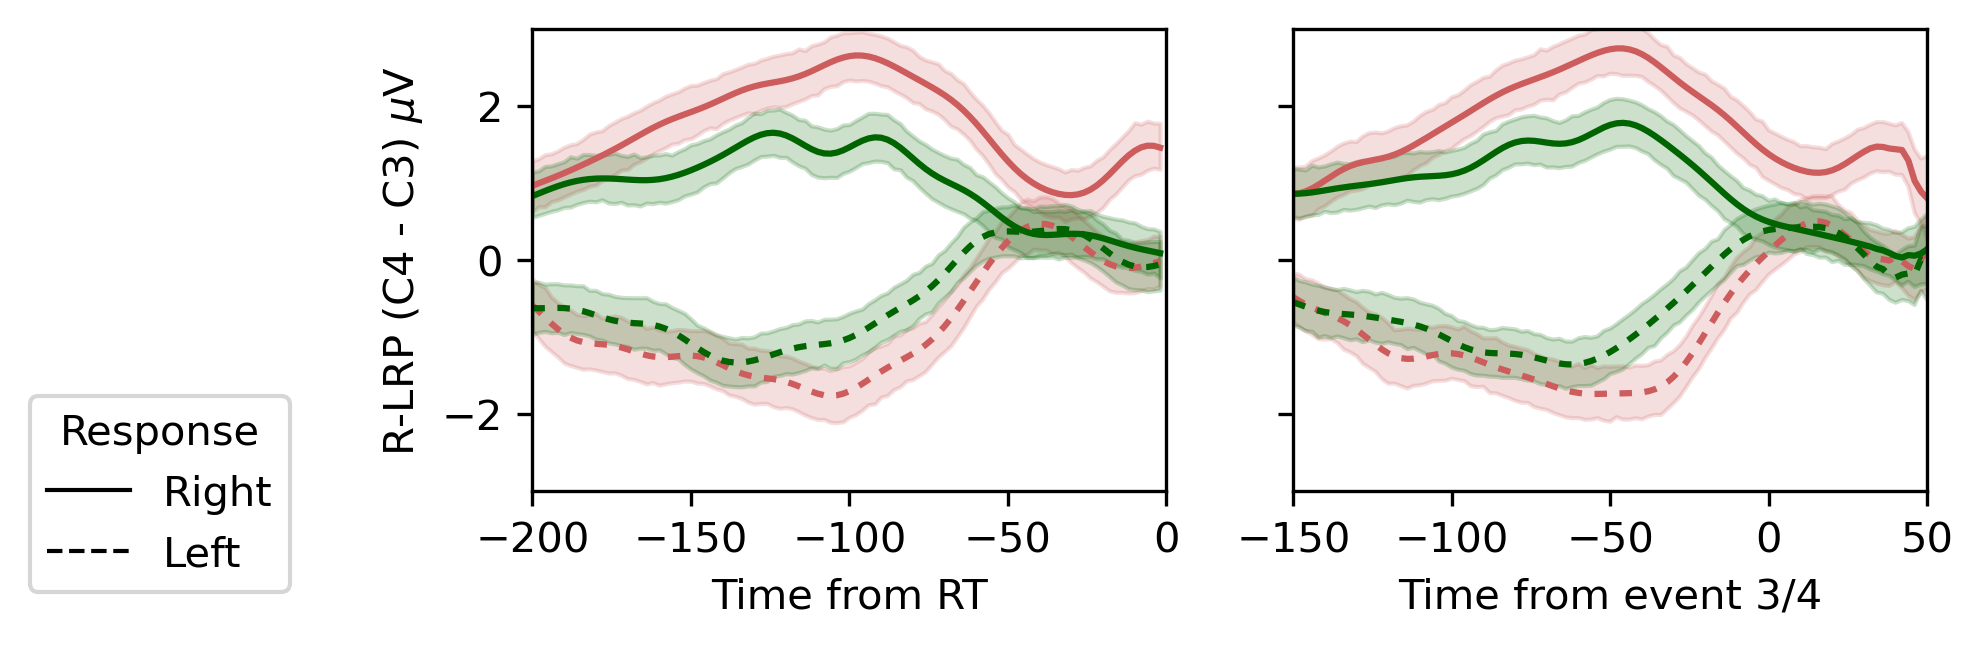

In [20]:
BRP_times_sp = init_speed.compute_times(init_speed, estimates_speed.dropna('event'), fill_value=0, add_rt=True)
BRP_times_acc = init_accuracy.compute_times(init_accuracy, estimates_accuracy.dropna('event'), fill_value=0, add_rt=True)
data = epoch_data.stack({'trial_x_participant':['participant','epochs']}).data.dropna('trial_x_participant', how="all")

fig, ax = plt.subplots(1,2, sharey=True, sharex=False, dpi=300, figsize=(6,2))
color_sat = {'SP':'indianred','AC':'darkgreen'}
name_sat = {'SP':'Speed','AC':'Accuracy'}
baseline = 75
stage_sat = {"SP":3, "AC":4}
BRP_times = {"SP":BRP_times_sp, "AC":BRP_times_acc}
for SAT in ["SP","AC"]:
    data_left_sp = data.where((data.resp == "resp_left") & (data.cue == SAT), drop=True).dropna('trial_x_participant', how="all")
    data_right_sp = data.where((data.resp == "resp_right") & (data.cue == SAT), drop=True).dropna('trial_x_participant', how="all")
    
    BRP_c4 = hmp.utils.event_times(data_left_sp, BRP_times[SAT],'C4', stage=stage_sat[SAT], baseline=baseline)
    BRP_c3 = hmp.utils.event_times(data_left_sp, BRP_times[SAT],'C3', stage=stage_sat[SAT], baseline=baseline)
    LRP_left = pd.DataFrame((BRP_c4 - BRP_c3)).melt(var_name='Time')
    LRP_left.Time -= baseline
    LRP_left.Time = LRP_left.Time*2
    sns.lineplot(x="Time", y="value", data=LRP_left, label="Left "+name_sat[SAT], legend=False,color=color_sat[SAT], dashes=[2])
    sns.lineplot(x="samples", y="data", data=ERP_df[(ERP_df.cue==SAT)
                 & (ERP_df.resp == "resp_left")], label="Left "+name_sat[SAT], legend=False,color=color_sat[SAT], ax=ax[0], dashes=[2])

    BRP_c4 = hmp.utils.event_times(data_right_sp, BRP_times[SAT],'C4', stage=stage_sat[SAT], baseline=baseline)
    BRP_c3 = hmp.utils.event_times(data_right_sp, BRP_times[SAT],'C3', stage=stage_sat[SAT], baseline=baseline)
    LRP_right = pd.DataFrame((BRP_c4 - BRP_c3)).melt(var_name='Time')
    LRP_right.Time -= baseline
    LRP_right.Time = LRP_right.Time*2
    sns.lineplot(x="Time", y="value", data=LRP_right, label="Right "+name_sat[SAT], legend=False,color=color_sat[SAT], ax=ax[1])
    sns.lineplot(x="samples", y="data", data=ERP_df[(ERP_df.cue==SAT)
                 & (ERP_df.resp == "resp_right")], label="Right "+name_sat[SAT], legend=False, color=color_sat[SAT], ax=ax[0])
plt.ylim(-3,3)
ax[0].set_xlim(-200,0)
ax[1].set_xlim(-150,50)
lss = ['-', '--']
lines = [Line2D([0], [0], color='k', linewidth=1, linestyle=ls) for ls in lss]
labels = [ 'Right','Left']
ax[0].legend(lines, labels, bbox_to_anchor=(-.35,0.25), title="Response")
ax[0].set_ylabel(r'R-LRP (C4 - C3) $\mu$V')
ax[1].set_ylabel(r'HMP-LRP (C4 - C3) $\mu$V')
ax[0].set_xlabel('Time from RT')
ax[1].set_xlabel('Time from event 3/4')
plt.savefig('../../plots/HMP-LRP.png',dpi=300,transparent=True,bbox_inches='tight')

## Diagnostic checks

/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (121) in plot_rank, generating only 40 plots
  warnings.warn(


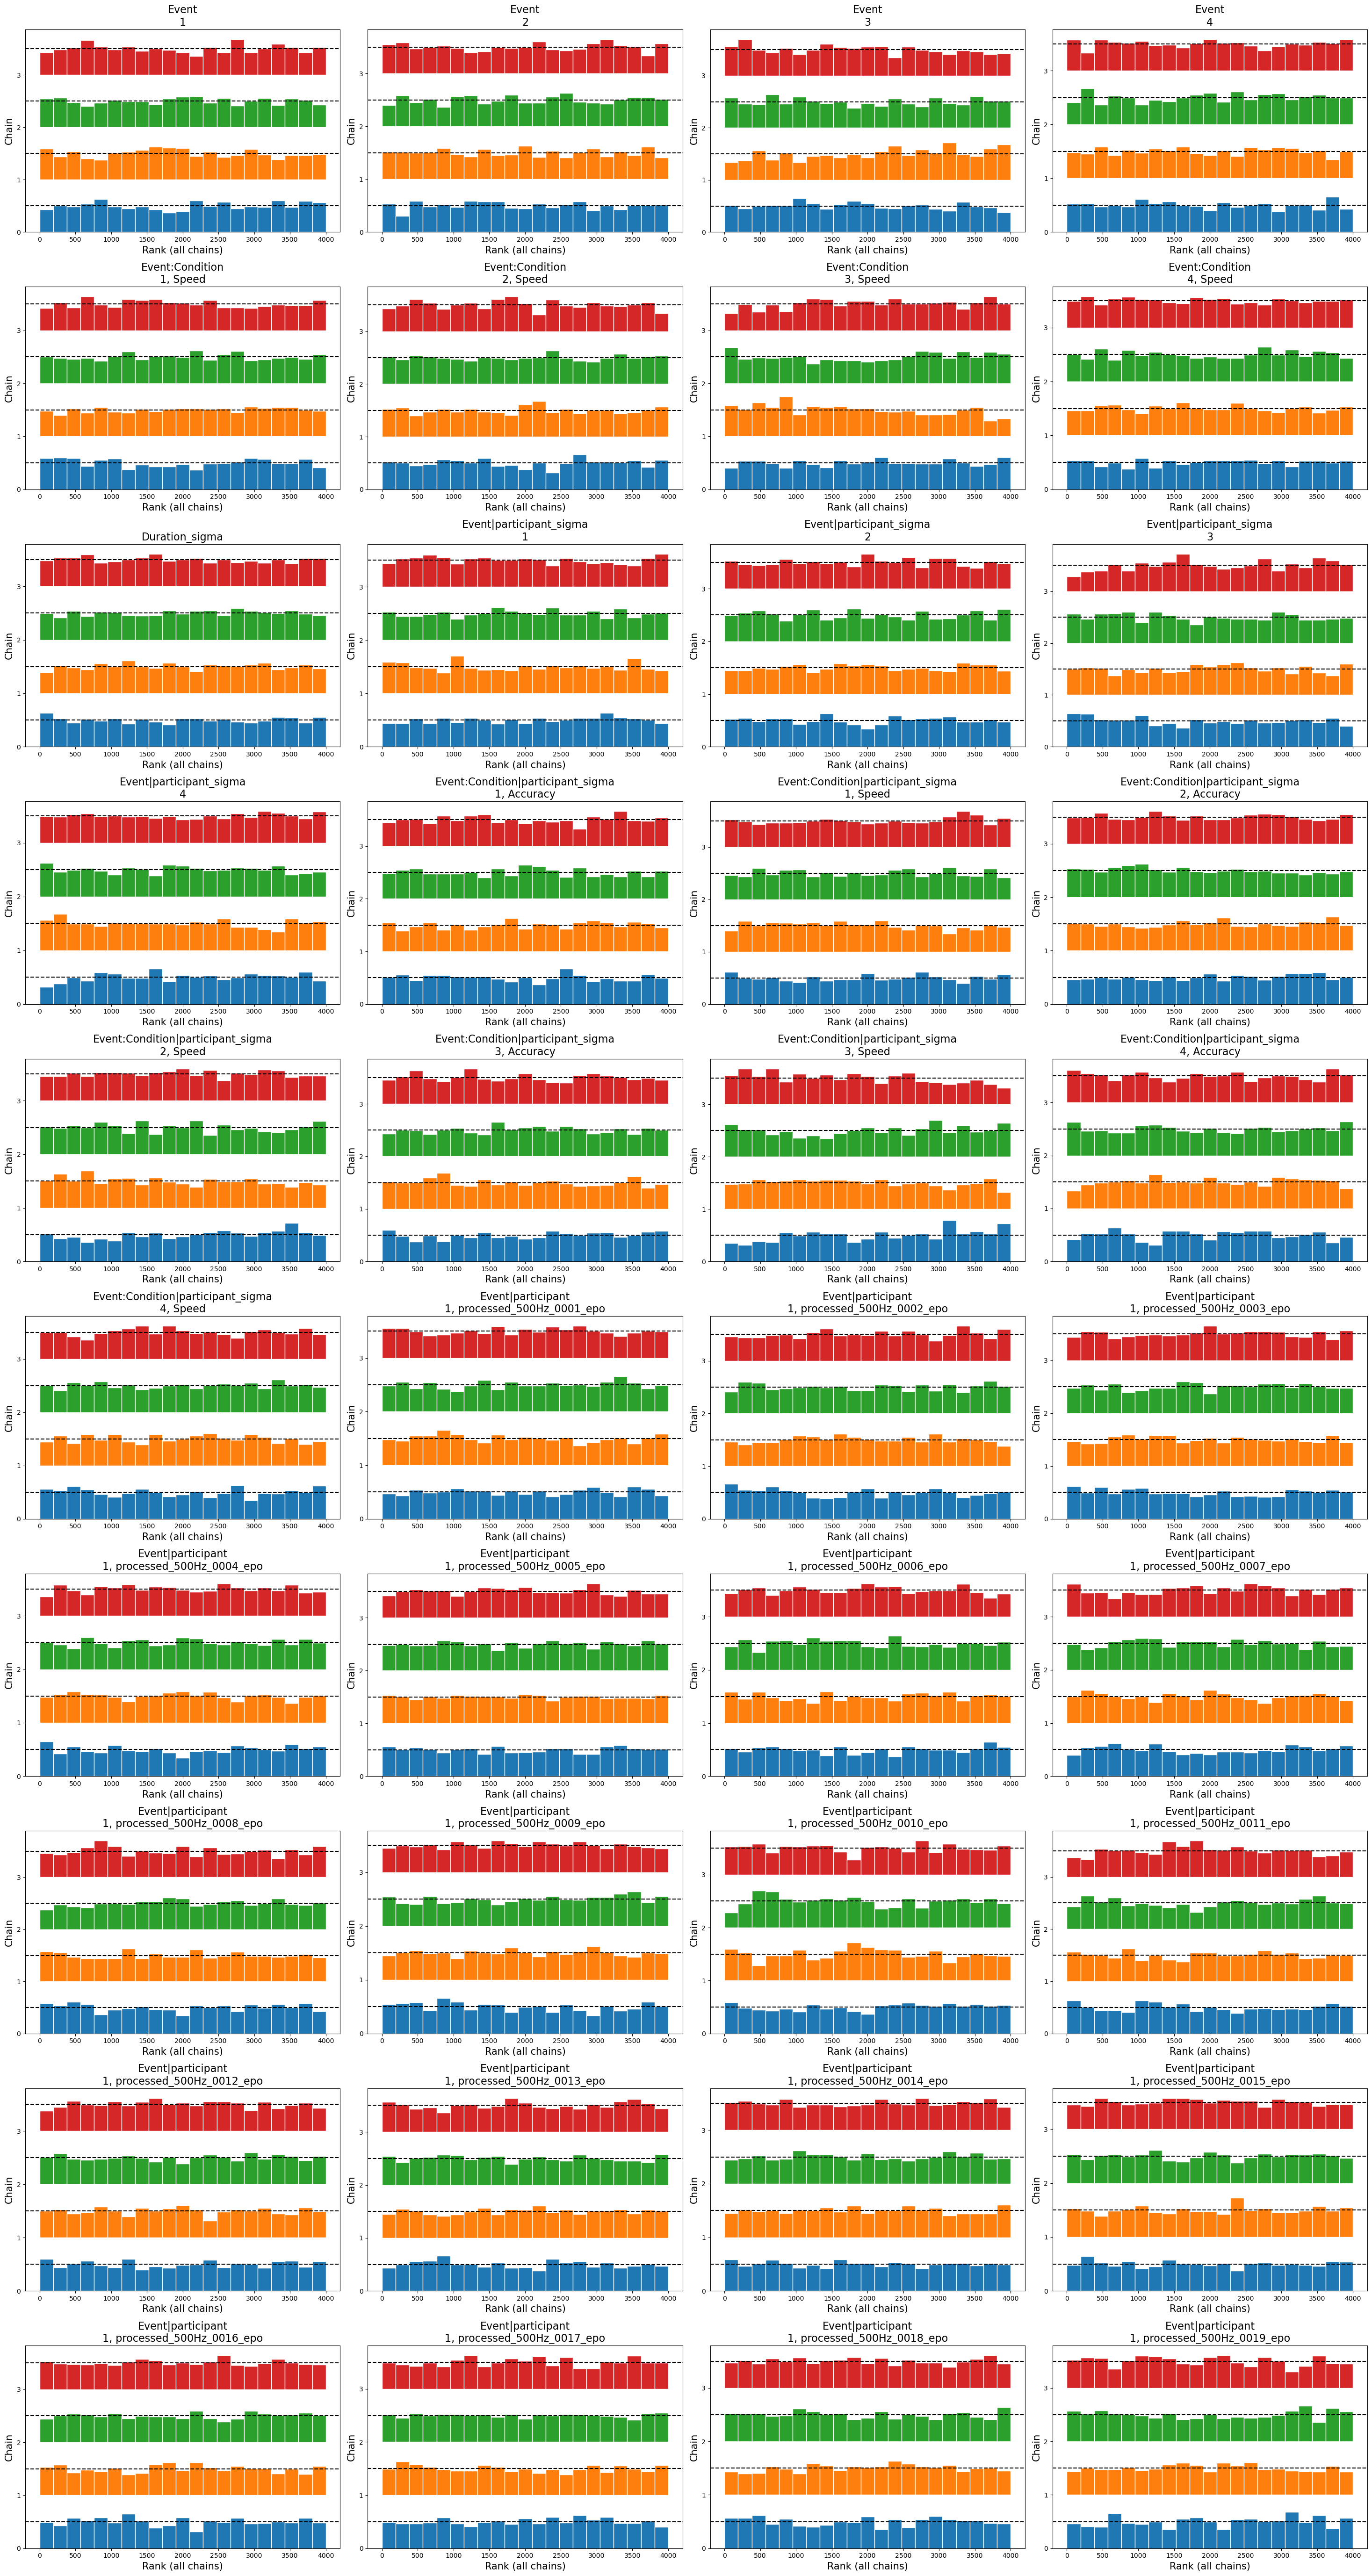

In [21]:
az.plot_rank(fit, var_names=list(list(fit.posterior.data_vars.keys()))[:-1])
plt.tight_layout()

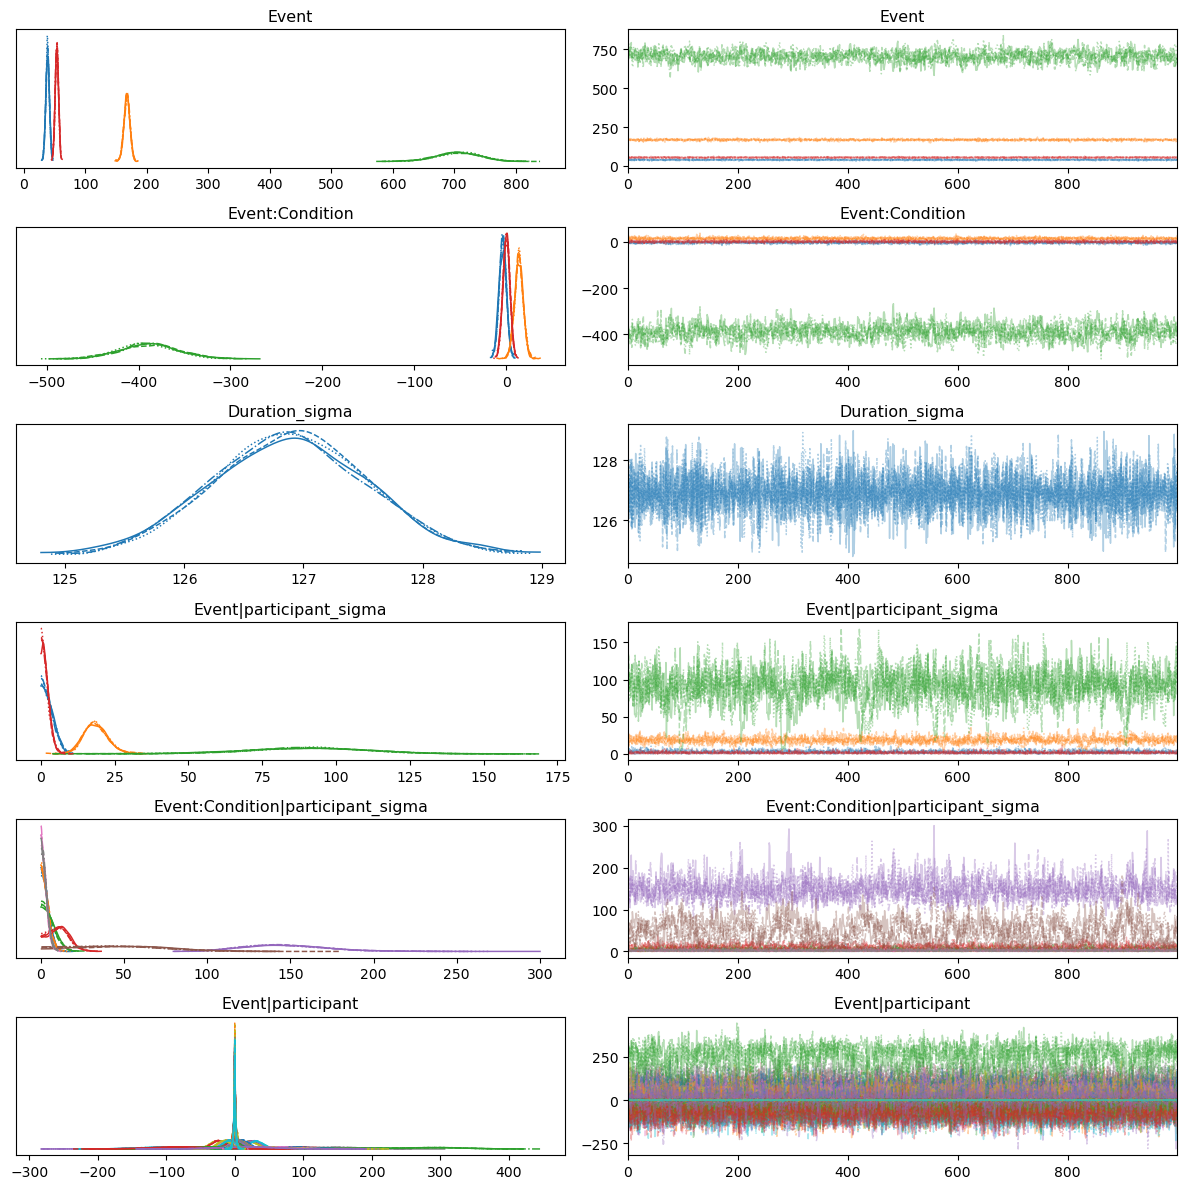

In [22]:
az.plot_trace(fit, compact=True, var_names=list(list(fit.posterior.data_vars.keys()))[:-1])
plt.tight_layout()

In [23]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Tue Feb 13 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.21.0

pandas    : 2.2.0
arviz     : 0.17.0
mne       : 1.6.1
numpy     : 1.26.4
hmp       : 0.3.0
seaborn   : 0.13.2
matplotlib: 3.8.2
bambi     : 0.13.0
xarray    : 2024.1.1

Watermark: 2.4.3

